In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

In [2]:
from seabird.cnv import fCNV
profile = fCNV('/ocean/sallen/allen/research/Falkor/5_bin/FK009A_CTD002_20130819.cnv')

DEBUG:root:Openning file: /ocean/sallen/allen/research/Falkor/5_bin/FK009A_CTD002_20130819.cnv


In [3]:
profile.keys()

['LATITUDE',
 'LONGITUDE',
 'timeQ',
 'PRES',
 'TEMP',
 'TEMP2',
 'CNDC',
 'CNDC2',
 'PSAL',
 'PSAL2',
 'oxigen_ml_L',
 'oxigenvoltage',
 'flECO-AFL',
 'turbWETntu0',
 'CStarTr0',
 'PSAL',
 'PSAL2',
 'potemperature',
 'potemperature2',
 'sigma-�00',
 'sigma-�11',
 'oxigen_ml_L',
 'nbin',
 'flag',
 'timeS']

In [4]:
pressure = profile['PRES'][:]
PT = profile['potemperature'][:]
T = profile['TEMP'][:]
SP = profile['PSAL'][:]
lat = profile['LATITUDE'][:]
lon = profile['LONGITUDE'][:]

In [5]:
lon

masked_array(data = [-124.68512 -124.68512 -124.68512 -124.68511 -124.68512 -124.68511
 -124.68511 -124.68512 -124.68512 -124.68512 -124.6851  -124.68512
 -124.68512 -124.68511 -124.68512 -124.68512 -124.68512 -124.68512
 -124.68512 -124.68512 -124.68513 -124.68512 -124.68512 -124.68514
 -124.68512 -124.68512 -124.68514 -124.68514 -124.68512 -124.68512
 -124.68513 -124.68514 -124.68512 -124.68513 -124.68514 -124.68514
 -124.68512 -124.68513 -124.68514 -124.68512 -124.68512 -124.68512
 -124.68512 -124.68512 -124.68512 -124.68512 -124.68512 -124.68512
 -124.68512 -124.68512 -124.68512 -124.68512 -124.68512 -124.68512
 -124.68512 -124.68512 -124.68512 -124.68512 -124.68512 -124.68513
 -124.68514 -124.68513 -124.68512 -124.68513 -124.68514 -124.68514
 -124.68514 -124.68514 -124.68514 -124.68514 -124.68514 -124.68514
 -124.68515 -124.68516 -124.68514 -124.68514 -124.68516 -124.68516
 -124.68516 -124.68516 -124.68516 -124.68516 -124.68516 -124.68516
 -124.68516 -124.68516 -124.68517 -124.685

In [6]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]

In [7]:
j, i = geo_tools.find_closest_model_point(
           -124.68511,48.48628,lon_model,lat_model,tols={
    'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

In [8]:
j,i

(271, 628)

In [9]:
import gsw

z = gsw.z_from_p(-pressure, lat)

In [10]:
def falkor_locations(profile):

    pressure = profile['PRES'][:]
    PT = profile['potemperature'][:]
    T = profile['TEMP'][:]
    SP = profile['PSAL'][:]
    lat = np.nanmean(profile['LATITUDE'][:])
    lon = np.nanmean(profile['LONGITUDE'][:])
    
    z = gsw.z_from_p(-pressure, lat)
    
    falkor_scalar_ts = namedtuple('falkor_scalar_ts', 'temp, sal, lat, lon, z')

    return falkor_scalar_ts(PT, SP, lat, lon, z)

In [11]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict

import os


temp_location = np.empty((41,z.shape[0]))
sal_location = np.empty((41,z.shape[0]))
lat_location = np.empty(41)
lon_location = np.empty(41)


file = []

i = 0
for file_number in sorted(glob.glob('/home/ssahu/saurav/Falkor_code/*.cnv')):
    
    file.append(file_number)
    
#     if file != '/ocean/sallen/allen/research/Falkor/5_bin/FK*up_*.cnv':
        
#         falkor_scalar_ts = falkor_locations(fCNV(file))
        
# #         temp_location = np.empty((41,falkor_scalar_ts[0].shape[0]))
# #         sal_location = np.empty((41,falkor_scalar_ts[0].shape[0]))
# #         lat_location = np.empty(41)
# #         lon_location = np.empty(41)
#         temp_location[i,:] = falkor_scalar_ts[0]
#         sal_location[i,:] = falkor_scalar_ts[1]
#         lat_location[i] = falkor_scalar_ts[2]
#         lon_location[i] = falkor_scalar_ts[3]
    
    i = i+1
#     else:
#         continue


In [12]:
temp_location = []
sal_location = []
lat_location = []
lon_location = []
z_location = []
# sal_location[j,:] = falkor_scalar_ts[1]
# lat_location[j] = falkor_scalar_ts[2]
# lon_location[j] = falkor_scalar_ts[3]


for j in np.arange(len(file)):

    falkor_scalar_ts = falkor_locations(fCNV(file[j]))
    
    
    temp_that_file = np.empty(falkor_scalar_ts[0].shape)
    temp_that_file = falkor_scalar_ts[0]
    temp_location.append(temp_that_file)
    
    sal_that_file = np.empty(falkor_scalar_ts[1].shape)
    sal_that_file = falkor_scalar_ts[1]
    sal_location.append(sal_that_file)
    
    
    z_that_file = np.empty(falkor_scalar_ts[4].shape)
    z_that_file = falkor_scalar_ts[4]
    z_location.append(z_that_file)    
    
    lat_that_file = np.empty(falkor_scalar_ts[2].shape)
    lat_that_file = falkor_scalar_ts[2]
    lat_location.append(lat_that_file)
    
    lon_that_file = np.empty(falkor_scalar_ts[3].shape)
    lon_that_file = falkor_scalar_ts[3]
    lon_location.append(lon_that_file)
    
    
    

    
temp_location = np.array(temp_location)
sal_location = np.array(sal_location)
z_location = np.array(z_location)
lat_location = np.array(lat_location)
lon_location = np.array(lon_location)

#     temp_location = np.append(arr=temp_location, values = temp_that_file ,axis=0)


#     sal_location[j,:] = falkor_scalar_ts[1]
#     lat_location[j] = falkor_scalar_ts[2]
#     lon_location[j] = falkor_scalar_ts[3]

DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD002_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD003_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD004_20130819.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD005_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD006_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD007_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD008_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD009_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD010_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD011_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD012_20130820.cnv
DEBUG:root:Openning file: /home/ssahu/saurav/Falkor_code/FK009A_CTD013_20130

#### Find out for our NEP36 model results the locations where the Falkor data is available

In [13]:
y = np.empty_like(lat_location)
x = np.empty_like(lat_location)


for i in np.arange(lat_location.shape[0]):
    y[i], x[i] = geo_tools.find_closest_model_point(
               lon_location[i],lat_location[i],lon_model,lat_model,tols={
        'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

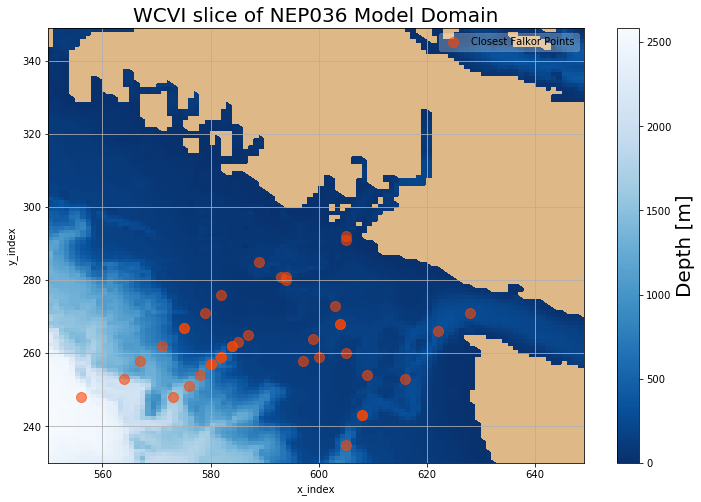

In [14]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

# Z = bathy.variables['Bathymetry'][y_wcvi_slice,x_wcvi_slice]
Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

# grid = nc.Dataset('/ocean/ssahu/CANYONS/wcvi/grid/coordinates_NEMO/coordinates_westcoast_seagrid_high_resolution_truncated_wider_west_bdy.nc')


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

# z0 = np.ma.masked_values(Z, 0)
# plt.plot(lon[::10,::10],lat[::10,::10],'m.')
cmap = plt.get_cmap('Blues_r')
# cmap.set_bad('gainsboro')
# cmap = cmo.cm.deep
cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(12,8)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
# ax.plot(
#     x[:], y[:], marker='o', color='cyan',
#     label='Falkor Data Points',
# )
ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.6, label = 'Closest Falkor Points')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.25)
n=20
n1 = 10
# ax.scatter(lon[::n,::n], lat[::n,::n], c='orangered', s=30, alpha=0.6)
# ax.scatter(lon[270:350:n1,550:650:n1], lat[270:350:n1,550:650:n1], c='cyan', s=30, alpha=0.6)
# ax.set_xlim([lon[270:350,550:650].min(), lon[270:350,550:650].max()])
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
# viz_tools.plot_coastline(ax, bathymetry=bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     left='off',      # ticks along the bottom edge are off
#     labelleft='off')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()
# plt.savefig('domain.png')

In [97]:
np.where(y>279)

(array([21, 22, 23, 24, 31, 32]),)

In [110]:
x[20:24]

array([ 603.,  594.,  593.,  605.])

In [112]:
x[32]

594.0

#### We are intersted in the 4 points at the data locations of 21,22,23 and 32 of Falkor and corresponding y,x of the model (NEP36)

In [128]:
print(np.max(z_location[21]), np.max(z_location[22]))

175.579832001 231.162170305


In [127]:
print(x[21],y[21], x[22],y[22])

594.0 281.0 593.0 281.0


#### Let us interpolate our model data to the Falkor vertical depths and make a plot to see how they compare those to the August model results (especially at the depths of the Low oxygen pool since we think that is a semi-permanent feature which means they should do well when compared and not depend upon individual days of August: Verify this ????)

### We have Practical Salinity and Potential temperature from Falkor data and now we need to find out the Spiciness 

In [15]:
SA_falk_loc = np.empty_like(sal_location)
CT_falk_loc = np.empty_like(temp_location)
pressure_falk_loc = np.empty_like(z_location)
spic_falk_loc = np.empty_like(sal_location)


for i in np.arange(lat_location.shape[0]):
    
    pressure_falk_loc[i] = gsw.p_from_z(-z_location[i],lat_location[i])
    
    SA_falk_loc[i] = gsw.SA_from_SP(sal_location[i], pressure_falk_loc[i], lon_location[i], lat_location[i])
    
    CT_falk_loc[i] = gsw.CT_from_pt(sal_location[i], temp_location[i])
    
    spic_falk_loc[i] = gsw.spiciness0(SA_falk_loc[i], CT_falk_loc[i])

    

In [46]:
NEP = nc.Dataset('/home/ssahu/saurav/Falkor_code/NEP36_T_S_Spice_aug.nc')


sal_aug = NEP.variables['vosaline']
temp_aug = NEP.variables['votemper']
spic_aug = NEP.variables['spiciness']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


In [44]:
spic_aug[12,25,y[21],x[21]]

-0.15072389

In [47]:
zlevels[25]

186.12556

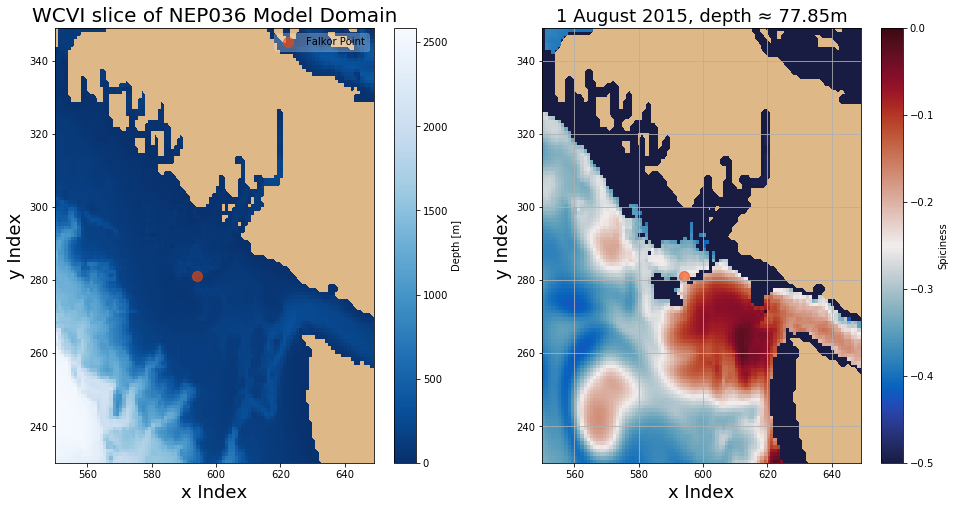

In [133]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 0
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


#### At the beginning of the month

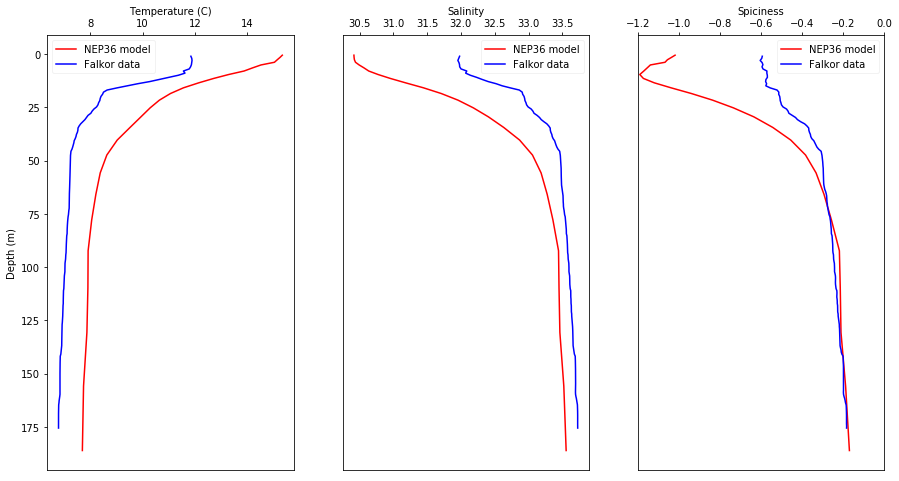

In [90]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

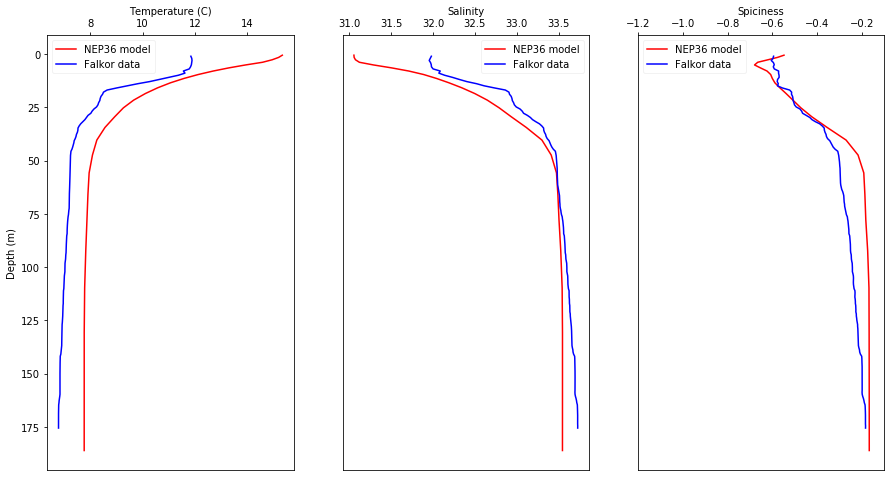

In [86]:
fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[6,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.set_xlim(-1.2,0)
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

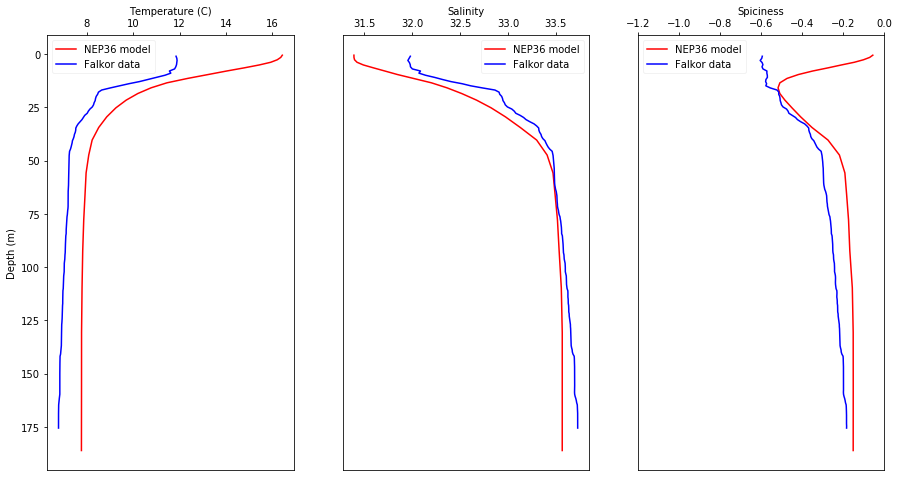

In [89]:
fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_aug[9,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

### At August 9 the pool moves into the falkor location (in the model as seen below) so in the Spice plot above we don't see the similar results at 77m depth; this leads us to believe that at this location  the results best matches on August 1 (beginning of the month after which it moves into the hole and makes the results look different from the Falkor observations)

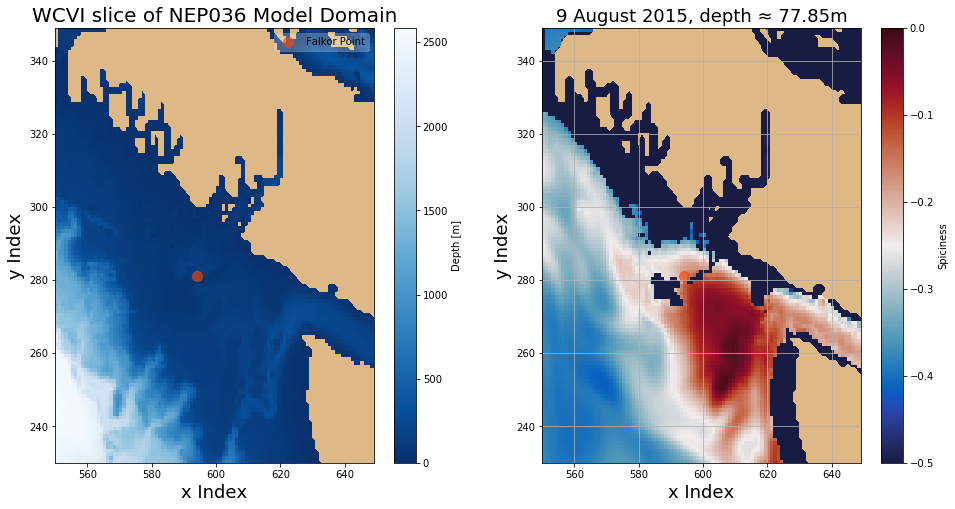

In [134]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_aug = 8
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_aug[t_aug,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} August 2015, depth \u2248 {d:.2f}{z.units}'.format(t_aug+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


### Let us take a look at our July results and see if they match with the Falkor

In [142]:
NEP = nc.Dataset('/home/ssahu/saurav/Falkor_code/NEP36_T_S_Spice_july.nc')


sal_jul = NEP.variables['vosaline']
temp_jul = NEP.variables['votemper']
spic_jul = NEP.variables['spiciness']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


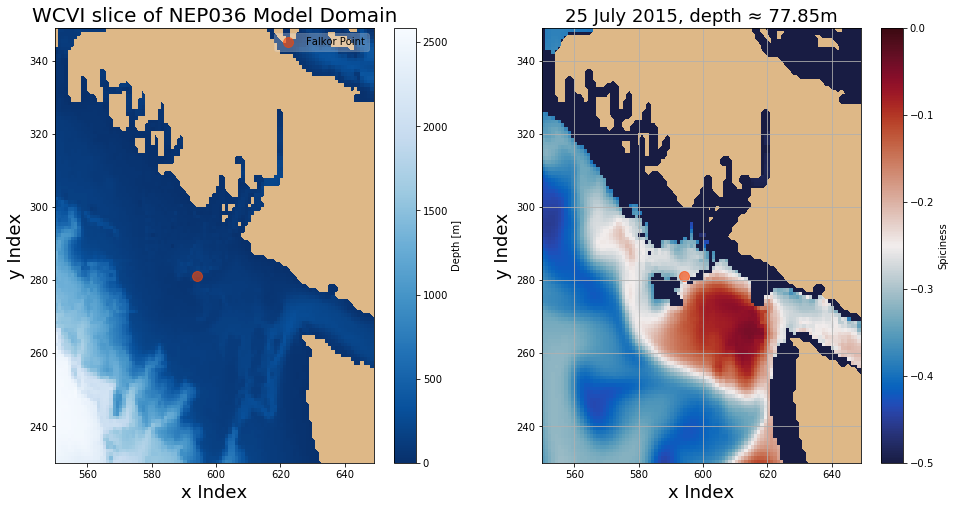

In [143]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


t_jul = 24
level = 20


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8)); ax1.grid()
viz_tools.set_aspect(ax1)
cmap = plt.get_cmap('Blues_r')
cmap.set_bad('burlywood')
p = ax1.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0)#, vmax=500)
ax1.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.25)
ax1.set_xlabel('x Index',fontsize=18)
ax1.set_ylabel('y Index',fontsize=18)
# ax.set_ylim([lat[270:350,550:650].min(), lat[270:350,550:650].max()])
ax1.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax1, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax1, label='Depth [m]')



viz_tools.set_aspect(ax2)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('burlywood')
mesh = ax2.pcolormesh(x_wcvi_slice,y_wcvi_slice,spic_jul[t_jul,level,y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin = -0.5, vmax = 0)

viz_tools.plot_land_mask(ax2, bathy, xslice=x_wcvi_slice, yslice=y_wcvi_slice, color='burlywood')
ax2.scatter(x[21], y[21], c='orangered', s=100, alpha=0.6, label = 'Falkor Point')
ax2.grid()
ax2.set_xlim(x_wcvi_slice[0], x_wcvi_slice[-1])
ax2.set_ylim(y_wcvi_slice[0], y_wcvi_slice[-1])
ax2.set_xlabel('x Index',fontsize=18)
ax2.set_ylabel('y Index',fontsize=18)
ax2.set_title('{0} July 2015, depth \u2248 {d:.2f}{z.units}'.format(t_jul+1, d=zlevels[level], z=zlevels),fontsize=18)
cbar = fig.colorbar(mesh, ax=ax2, label='Spiciness')


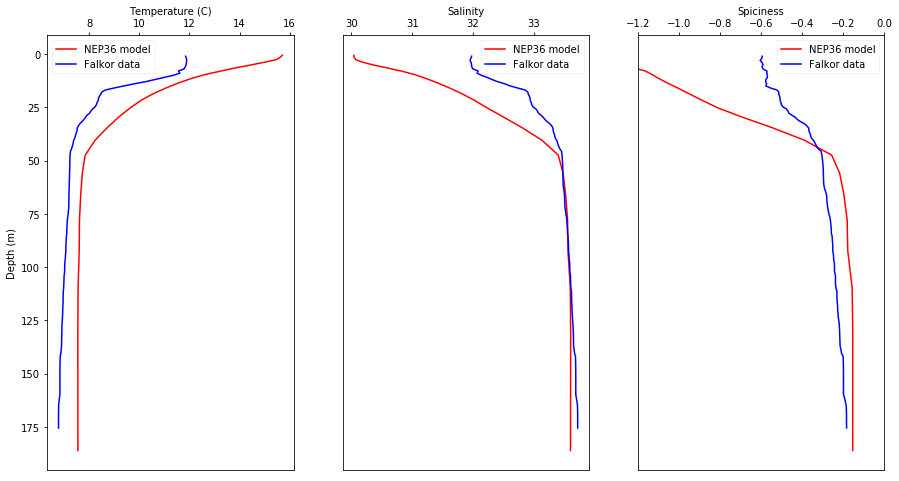

In [144]:

fig2, (ax2, ax3, ax4) = plt.subplots(1,3,sharey=True,figsize=(15,8))
# Temperature
ax2.plot(temp_jul[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax2.plot(temp_location[21],z_location[21],'b',label='Falkor data')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) 
ax2.set_xlabel('Temperature (C)')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
legend = ax2.legend(loc='best', fancybox=True, framealpha=0.25)
# Salinity
ax3.plot(sal_jul[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax3.plot(sal_location[21],z_location[21],'b',label='Falkor data')
ax3.set_xlabel('Salinity')
ax3.xaxis.set_label_position('top') 
ax3.xaxis.set_ticks_position('top') 
ax3.yaxis.set_visible(False) 
legend = ax3.legend(loc='best', fancybox=True, framealpha=0.25)
# Spiciness
ax4.plot(spic_jul[0,:26,y[21],x[21]],zlevels[:26],'r',label = 'NEP36 model')
ax4.plot(spic_falk_loc[21],z_location[21],'b',label='Falkor data')
ax4.set_xlabel('Spiciness')
ax4.xaxis.set_label_position('top') 
ax4.xaxis.set_ticks_position('top') 
ax4.yaxis.set_visible(False) 
ax4.set_xlim(-1.2,0)
legend = ax4.legend(loc='best', fancybox=True, framealpha=0.25)

#### We think that the spicy water into the hole is caused by the weaking of the shelf break current and this time the Falkor doesn't match with the model
